In [22]:
import pandas as pd
import numpy as np

In [23]:
preds = pd.read_csv('preds.csv')

In [55]:
preds.columns

Index(['base_date', 'Local Code', 'label_date_5', 'label_high_5',
       'label_low_5', 'label_date_10', 'label_high_10', 'label_low_10',
       'label_date_20', 'label_high_20', 'label_low_20', 'prediction_target',
       'Effective Date', 'Name (English)', 'Section/Products',
       '33 Sector(Code)', '33 Sector(name)', '17 Sector(Code)',
       '17 Sector(name)', 'Size Code (New Index Series)',
       'Size (New Index Series)', 'IssuedShareEquityQuote AccountingStandard',
       'IssuedShareEquityQuote ModifyDate',
       'IssuedShareEquityQuote IssuedShare', 'EndOfDayQuote Open',
       'EndOfDayQuote High', 'EndOfDayQuote Low', 'EndOfDayQuote Close',
       'EndOfDayQuote ExchangeOfficialClose', 'EndOfDayQuote Volume',
       'EndOfDayQuote CumulativeAdjustmentFactor',
       'EndOfDayQuote PreviousClose', 'EndOfDayQuote PreviousCloseDate',
       'EndOfDayQuote PreviousExchangeOfficialClose',
       'EndOfDayQuote PreviousExchangeOfficialCloseDate',
       'EndOfDayQuote ChangeFr

In [24]:
preds.head()

,base_date,Local Code,label_date_5,label_high_5,label_low_5,label_date_10,label_high_10,label_low_10,label_date_20,label_high_20,...,EndOfDayQuote PreviousCloseDate,EndOfDayQuote PreviousExchangeOfficialClose,EndOfDayQuote PreviousExchangeOfficialCloseDate,EndOfDayQuote ChangeFromPreviousClose,EndOfDayQuote PercentChangeFromPreviousClose,EndOfDayQuote VWAP,rr_high,rr_low,lgbm_high,lgbm_low
0,2020-01-06,1301,2020-01-14,0.03040,-0.00245,2020-01-21,0.03075,-0.00245,2020-02-04,0.03075,...,2019/12/30,2875.0,2019/12/30,-13.0,-0.452,2863.012,-0.015203,-0.028192,0.037407,-0.022675
1,2020-01-07,1301,2020-01-15,0.01760,-0.01484,2020-01-22,0.01794,-0.01484,2020-02-05,0.01794,...,2020/01/06,2862.0,2020/01/06,36.0,1.258,2890.366,-0.028032,-0.033957,0.016727,-0.034729
2,2020-01-08,1301,2020-01-16,0.01585,-0.00138,2020-01-23,0.01619,-0.00138,2020-02-06,0.01619,...,2020/01/07,2898.0,2020/01/07,5.0,0.173,2886.993,-0.031131,-0.036918,0.017861,-0.035539
3,2020-01-09,1301,2020-01-17,0.00477,-0.01159,2020-01-24,0.00580,-0.01637,2020-02-07,0.00580,...,2020/01/08,2903.0,2020/01/08,30.0,1.033,2931.533,-0.035164,-0.046555,0.008418,-0.039738
4,2020-01-10,1301,2020-01-20,0.00546,-0.01126,2020-01-27,0.00614,-0.02524,2020-02-10,0.00614,...,2020/01/09,2933.0,2020/01/09,-1.0,-0.034,2933.422,-0.034340,-0.045766,0.007481,-0.040194


In [25]:
preds[['base_date', 'Name (English)', 'label_high_20', 'rr_high', 'lgbm_high', 'label_low_20', 'rr_low', 'lgbm_low']]

,base_date,Name (English),label_high_20,rr_high,lgbm_high,label_low_20,rr_low,lgbm_low
0,2020-01-06,"KYOKUYO CO.,LTD.",0.03075,-0.015203,0.037407,-0.02166,-0.028192,-0.022675
1,2020-01-07,"KYOKUYO CO.,LTD.",0.01794,-0.028032,0.016727,-0.03382,-0.033957,-0.034729
2,2020-01-08,"KYOKUYO CO.,LTD.",0.01619,-0.031131,0.017861,-0.03548,-0.036918,-0.035539
3,2020-01-09,"KYOKUYO CO.,LTD.",0.00580,-0.035164,0.008418,-0.04535,-0.046555,-0.039738
4,2020-01-10,"KYOKUYO CO.,LTD.",0.00614,-0.034340,0.007481,-0.04502,-0.045766,-0.040194
...,...,...,...,...,...,...,...,...
856084,2020-12-24,"BELLUNA CO.,LTD.",NaN,0.108649,0.081255,NaN,-0.041534,-0.096856
856085,2020-12-25,"BELLUNA CO.,LTD.",NaN,0.108548,0.081499,NaN,-0.042022,-0.108672
856086,2020-12-28,"BELLUNA CO.,LTD.",NaN,0.106121,0.083571,NaN,-0.044235,-0.128357
856087,2020-12-29,"BELLUNA CO.,LTD.",NaN,0.107338,0.082693,NaN,-0.043542,-0.117479


In [29]:
preds['Pred_Difference_rr_high'] = abs(preds['rr_high'] - preds['label_high_20'])
preds['Pred_Difference_lgbm_high'] = abs(preds['lgbm_high'] - preds['label_high_20'])

preds['Pred_Difference_rr_low'] = abs(preds['rr_low'] - preds['label_low_20'])
preds['Pred_Difference_lgbm_low'] = abs(preds['lgbm_low'] - preds['label_low_20'])

preds['Pred_Difference_low_avg'] = preds[['rr_low', 'lgbm_low']].mean(axis=1)
preds['Pred_Difference_high_avg'] = preds[['rr_high', 'lgbm_high']].mean(axis=1)

In [30]:
HIGH_biggest_over_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_high', ascending=False)[0:100]
HIGH_biggest_over_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_high', ascending=False)[0:100]

HIGH_biggest_under_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_high', ascending=True)[0:100]
HIGH_biggest_under_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_high', ascending=True)[0:100]

In [31]:
LOW_biggest_over_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_low', ascending=False)[0:100]
LOW_biggest_over_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_low', ascending=False)[0:100]

LOW_biggest_under_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_low', ascending=True)[0:100]
LOW_biggest_under_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_low', ascending=True)[0:100]

In [32]:
## Sort Values by Stock Performance 10 best - 10 worst get those plots. 

In [63]:
import matplotlib.pyplot as plt
# Used to plot stocks 

def plot_data(column_to_check: str, preds: pd.DataFrame, best_or_worst: str, total_plots:int=10):
    if best_or_worst == 'best':
        codes = preds.groupby('Local Code')[f'{column_to_check}'].mean().sort_values(ascending=True)
    else: 
        codes = preds.groupby('Local Code')[f'{column_to_check}'].mean().sort_values(ascending=False)
        
    for code in codes[0:total_plots].index:
        df = preds[preds['Local Code'] == code]
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.gca()
        df.set_index('base_date')[f'label_high_20'].plot(ax=ax1, label='actual_high', color='blue')
        df.set_index('base_date')[f'lgbm_high'].plot(ax=ax1, color='purple', linestyle='dashed', label='lgbm_high')
        df.set_index('base_date')[f'label_low_20'].plot(ax=ax1, label='actual_low', color='blue')
        df.set_index('base_date')[f'lgbm_low'].plot(ax=ax1, color='purple', linestyle='dashed', label='lgbm_low')
        
        df.set_index('base_date')[f'Pred_Difference_low_avg'].plot(ax=ax1, color='black', linestyle='dotted', label='low_avg')
        df.set_index('base_date')[f'Pred_Difference_high_avg'].plot(ax=ax1, color='black', linestyle='dotted', label='high_avg')
        
        df.set_index('base_date')[f'rr_high'].plot(ax=ax1, color='teal', linestyle='dashed', label='rr_high')
        df.set_index('base_date')[f'rr_low'].plot(ax=ax1, color='teal', linestyle='dashed', label='rr_low')
        plt.legend()
        plt.title(f"{df['Name (English)'].unique()[0]}: {df['33 Sector(name)'].unique()[0]}: {df['33 Sector(name)'].unique()[0]} {codes[code]}")

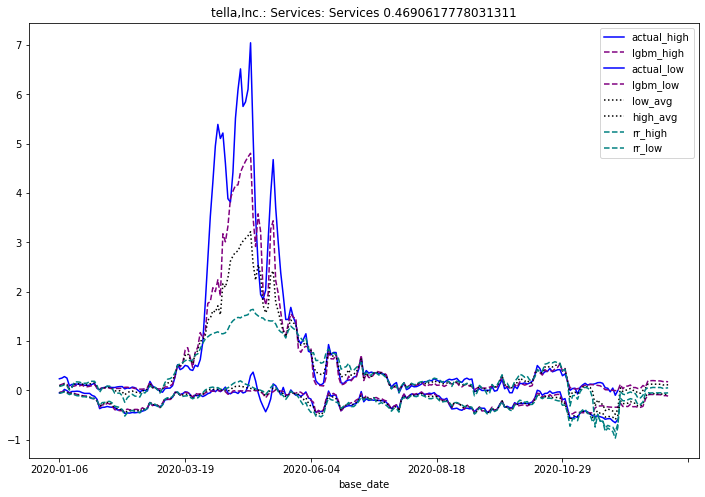

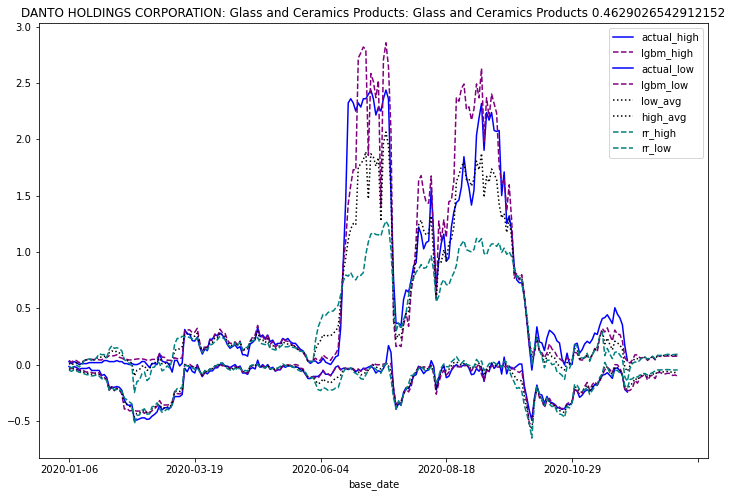

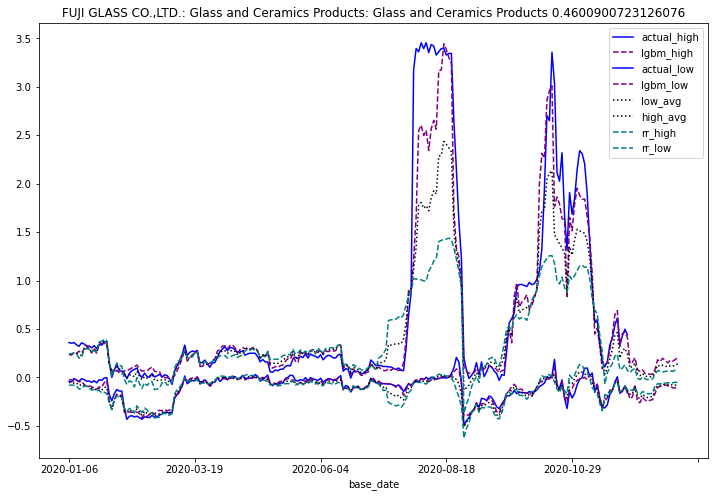

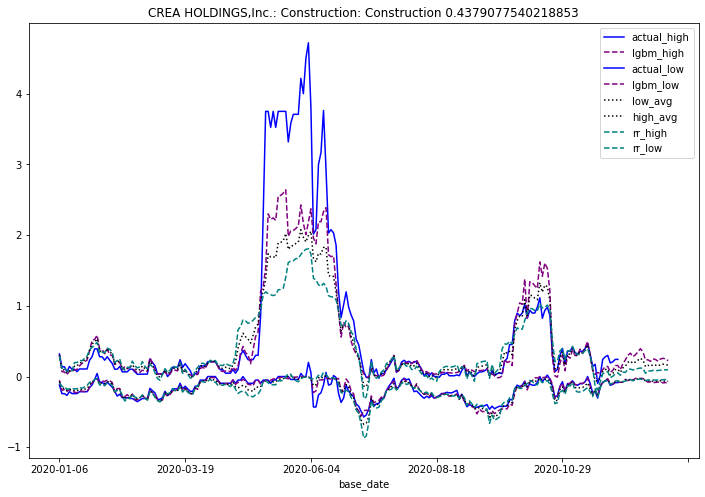

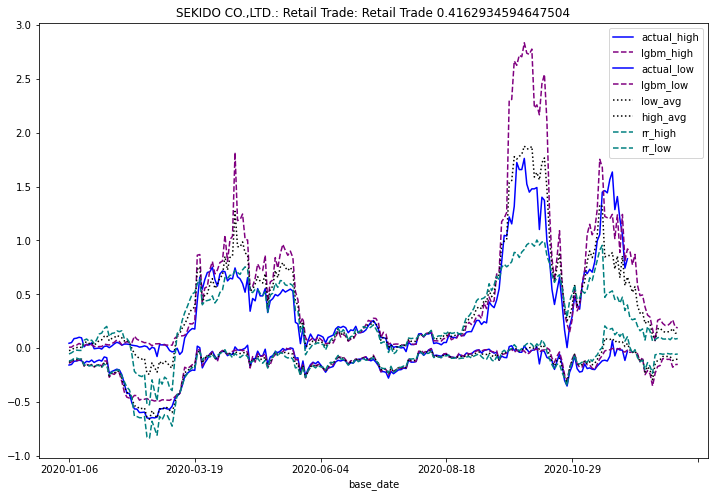

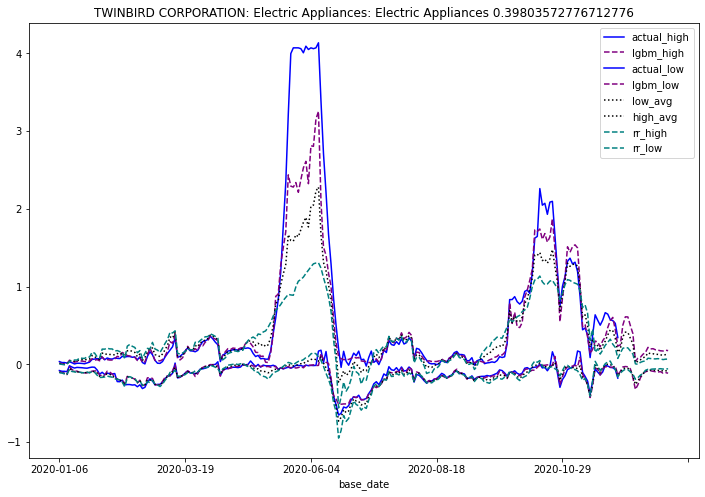

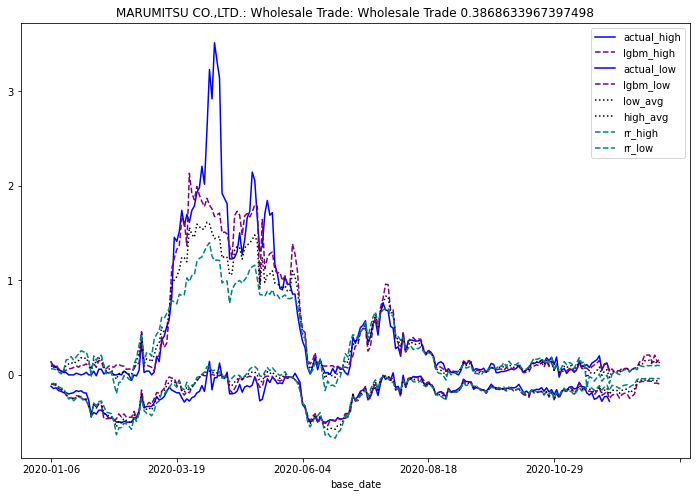

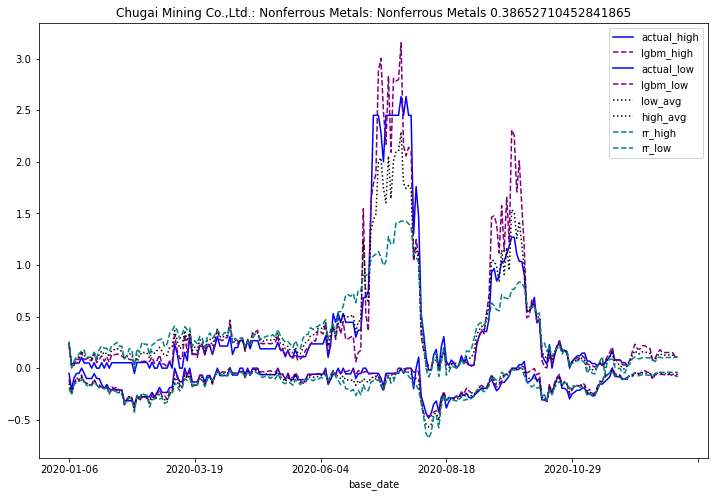

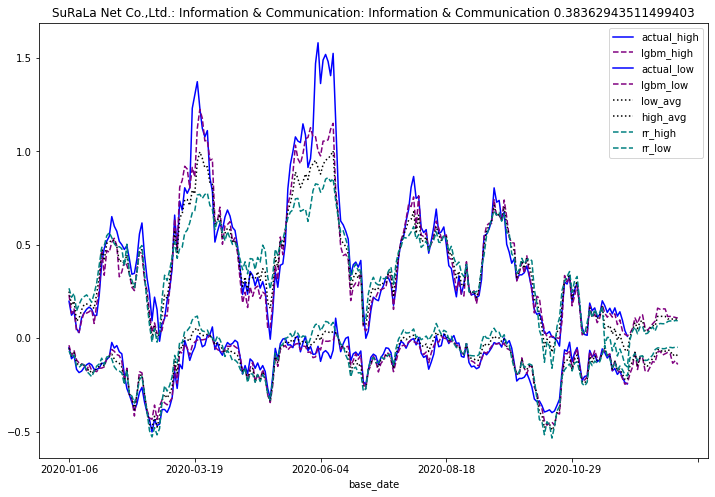

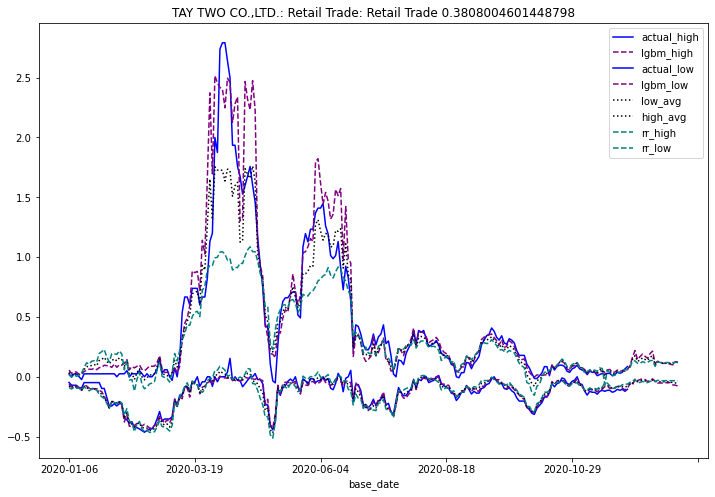

In [66]:
## 
# Column_to_check 
# Options 
# "Pred_Difference_rr_high" - Choose plots based on Ridge Regression high model 
# "Pred_Difference_rr_low" - Choose plots based on Ridge Regression low model 
# "Pred_Difference_lgbm_high" - Choose plots based on lgbm high model
# "Pred_Difference_lgbm_low" - Choose plots based on lgbm low model 
# "Pred_Difference_high_avg"- Choose plots

## Best_or_worst - 
# Can be 'best' to get best performing stocks given model
# can be 'worst' to get worst performing stocks given model

plot_data('Pred_Difference_high_avg', preds, 'worst')